<a href="https://colab.research.google.com/github/MarceloGarcia92/1.PersonalProject_HandModel/blob/main/Images_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyheif

In [18]:
import pyheif
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Using a file path:
heif_file = '/content/drive/MyDrive/3. Pose_Estimation_by_Putos/Fotos/20210520_140454310_iOS.heic'

In [19]:
from PIL import Image

heif_file = pyheif.read(heif_file)
image = Image.frombytes(
    heif_file.mode, 
    heif_file.size, 
    heif_file.data,
    "raw",
    heif_file.mode,
    heif_file.stride,
    )

In [20]:
image_array = np.array(image)

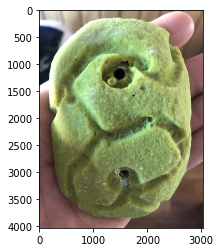

In [21]:
plt.imshow(image_array)

In [22]:
image_array.shape

(4032, 3024, 3)

In [24]:
lower_color = np.array([100,0,0])
upper_color = np.array([255,255,255])

def colors(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
           
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_color, upper_color)
    res = cv2.bitwise_and(img, img, mask = mask)

    return res

In [25]:
res = colors(image_array)

(4032, 3024, 3)


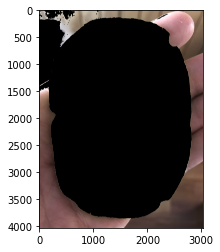

In [26]:
plt.imshow(res)
print(image_array.shape)

In [ ]:
n_empty = np.zeros((image_array.shape[0], image_array.shape[1], image_array.shape[2]))
n_empty.shape

In [29]:
for z in range(image_array.shape[2]):
  for y in range(image_array.shape[1]):
    for x in range(image_array.shape[0]):
      if image_array[x,y,z] > 1:
        n_empty[x,y,z] = 1

In [ ]:
n_empty.shape